# Project Group 32 Data wrangling

### Group members
1. Autar, Remi. 2622234
2. Linger, David. 2741629
3. Linger, Michael. 2533051
4. Peker, Yusuf. 2732407


### **Research question**: What are the trends and disparities in global suicide rates across different age groups and genders, and how do these vary among countries?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file1 = 'suicide-death-rates-by-sex-who.csv'
file2 = 'suicide-rates-by-age-detailed.csv'
df_sex = pd.read_csv(file1)
df_age = pd.read_csv(file2)

In [3]:
df_sex # DataFrame which includes the global suicide rates for male and female

,Entity,Code,Year,Age-standardized suicide rate - Sex: both sexes,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female
0,Afghanistan,AFG,2000,7.7100,7.6200,7.7700
1,Afghanistan,AFG,2001,7.8900,7.8500,7.8900
2,Afghanistan,AFG,2002,7.8500,7.9500,7.6900
3,Afghanistan,AFG,2003,7.7200,7.7800,7.6000
4,Afghanistan,AFG,2004,7.7700,7.8600,7.6200
...,...,...,...,...,...,...
3875,Zimbabwe,ZWE,2015,30.7352,47.3654,19.1859
3876,Zimbabwe,ZWE,2016,28.6973,44.4823,17.7111
3877,Zimbabwe,ZWE,2017,25.8514,41.3055,15.0037
3878,Zimbabwe,ZWE,2018,23.8676,38.5506,13.4846


In [4]:
df_age # DataFrame which includes the global suicide rates for different age groups

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)
0,Afghanistan,AFG,1990,0.41,10.12,12.47,10.69,6.10
1,Afghanistan,AFG,1991,0.39,9.93,12.36,10.57,5.96
2,Afghanistan,AFG,1992,0.39,9.88,12.34,10.52,5.88
3,Afghanistan,AFG,1993,0.39,10.06,12.50,10.55,5.90
4,Afghanistan,AFG,1994,0.38,10.30,12.73,10.62,5.93
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,0.27,21.04,48.59,86.69,15.88
6836,Zimbabwe,ZWE,2016,0.28,21.32,48.21,85.61,16.05
6837,Zimbabwe,ZWE,2017,0.29,21.36,47.59,84.05,16.08
6838,Zimbabwe,ZWE,2018,0.30,21.34,46.71,81.17,16.06


In [5]:
# Check the number of unique values for each columns in the df_sex datasets
df_sex.nunique()

Entity                                              194
Code                                                184
Year                                                 20
Age-standardized suicide rate - Sex: both sexes    2679
Age-standardized suicide rate - Sex: male          3275
Age-standardized suicide rate - Sex: female        1339
dtype: int64

In [6]:
# Check the number of unique values for each columns in the df_sex datasets
df_age.nunique()

Entity                                                       228
Code                                                         205
Year                                                          30
Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)      323
Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)    2578
Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)    3233
Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)      3953
Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)       2311
dtype: int64

In [7]:
# retrieves the number of rows with missing values
num_missing_sex = df_sex[df_sex.isnull().any(1)].shape[0]
print(f'There are {num_missing_sex} incomplete records in df_sex.\n')

# Shows the count of non_null values in each column and the total number of rows in the dataset
df_sex.info()

There are 200 incomplete records in df_sex.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           3880 non-null   object 
 1   Code                                             3680 non-null   object 
 2   Year                                             3880 non-null   int64  
 3   Age-standardized suicide rate - Sex: both sexes  3880 non-null   float64
 4   Age-standardized suicide rate - Sex: male        3880 non-null   float64
 5   Age-standardized suicide rate - Sex: female      3880 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 182.0+ KB


In [8]:
# retrieves the number of rows with missing values
num_missing_age = df_age[df_age.isnull().any(1)].shape[0]
print(f'there are {num_missing_age} incomplete records in df_age.\n')

# Shows the count of non_null values in each column and the total number of rows in the dataset
df_age.info()

there are 690 incomplete records in df_age.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    6840 non-null   object 
 1   Code                                                      6150 non-null   object 
 2   Year                                                      6840 non-null   int64  
 3   Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)   6840 non-null   float64
 4   Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)  6840 non-null   float64
 5   Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)  6840 non-null   float64
 6   Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)    6840 non-null   float64
 7   Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)     684

### Both datasets are comprehensive, with the exception of the 'Code' column, which denotes the country code. Since the country names in the 'Entity' column are adequate for identifying the countries, we will proceed by removing the 'Code' columns from both datasets. No additional actions are required to address missing values after this step.

In [9]:
df_sex.drop(columns = 'Code', inplace = True)
df_sex

,Entity,Year,Age-standardized suicide rate - Sex: both sexes,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female
0,Afghanistan,2000,7.7100,7.6200,7.7700
1,Afghanistan,2001,7.8900,7.8500,7.8900
2,Afghanistan,2002,7.8500,7.9500,7.6900
3,Afghanistan,2003,7.7200,7.7800,7.6000
4,Afghanistan,2004,7.7700,7.8600,7.6200
...,...,...,...,...,...
3875,Zimbabwe,2015,30.7352,47.3654,19.1859
3876,Zimbabwe,2016,28.6973,44.4823,17.7111
3877,Zimbabwe,2017,25.8514,41.3055,15.0037
3878,Zimbabwe,2018,23.8676,38.5506,13.4846


In [10]:
df_age.drop(columns = 'Code', inplace= True)
df_age


,Entity,Year,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)
0,Afghanistan,1990,0.41,10.12,12.47,10.69,6.10
1,Afghanistan,1991,0.39,9.93,12.36,10.57,5.96
2,Afghanistan,1992,0.39,9.88,12.34,10.52,5.88
3,Afghanistan,1993,0.39,10.06,12.50,10.55,5.90
4,Afghanistan,1994,0.38,10.30,12.73,10.62,5.93
...,...,...,...,...,...,...,...
6835,Zimbabwe,2015,0.27,21.04,48.59,86.69,15.88
6836,Zimbabwe,2016,0.28,21.32,48.21,85.61,16.05
6837,Zimbabwe,2017,0.29,21.36,47.59,84.05,16.08
6838,Zimbabwe,2018,0.30,21.34,46.71,81.17,16.06


### Following that, we merge the datasets to create a unified dataset.

#### By restricting our analysis to the period from 2000-2019, we ensure that the data is consistent across both datasets. This consistency is crucial for drawing accurate comparisons and valid conclusions. Our merge approach guarantees that we are analyzing periods where complete data exists for both gender and age groups, as analyzing partial data could result in skewed or inaccurate results. Additionally, focusing on the period from 2000-2019 allows us to concentrate on recent trends and disparities, eliminating the need to create artificial data, which also could have lead to inaccurate conclusions.

In [11]:
# performs an innner join between the df_sex dataframe and df_age dataframe on the Entity and Year columns.

df_combined = df_sex.merge(df_age, how='inner', on=['Entity','Year'])
df_combined


,Entity,Year,Age-standardized suicide rate - Sex: both sexes,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)
0,Afghanistan,2000,7.7100,7.6200,7.7700,0.33,11.15,13.45,10.79,5.84
1,Afghanistan,2001,7.8900,7.8500,7.8900,0.34,11.23,13.56,10.80,5.84
2,Afghanistan,2002,7.8500,7.9500,7.6900,0.35,10.58,13.22,10.66,5.53
3,Afghanistan,2003,7.7200,7.7800,7.6000,0.38,10.50,13.01,10.54,5.48
4,Afghanistan,2004,7.7700,7.8600,7.6200,0.39,10.50,12.85,10.47,5.47
...,...,...,...,...,...,...,...,...,...,...
3675,Zimbabwe,2015,30.7352,47.3654,19.1859,0.27,21.04,48.59,86.69,15.88
3676,Zimbabwe,2016,28.6973,44.4823,17.7111,0.28,21.32,48.21,85.61,16.05
3677,Zimbabwe,2017,25.8514,41.3055,15.0037,0.29,21.36,47.59,84.05,16.08
3678,Zimbabwe,2018,23.8676,38.5506,13.4846,0.30,21.34,46.71,81.17,16.06


In [12]:
df_combined.nunique() # Check the number of unique values for each columns in the combined dataset

Entity                                                       184
Year                                                          20
Age-standardized suicide rate - Sex: both sexes             2538
Age-standardized suicide rate - Sex: male                   3090
Age-standardized suicide rate - Sex: female                 1313
Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)      253
Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)    1796
Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)    2301
Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)      2552
Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)       1694
dtype: int64

In [13]:
df_combined.info() # Shows the count of non_null values in each column and the total number of rows in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 3679
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    3680 non-null   object 
 1   Year                                                      3680 non-null   int64  
 2   Age-standardized suicide rate - Sex: both sexes           3680 non-null   float64
 3   Age-standardized suicide rate - Sex: male                 3680 non-null   float64
 4   Age-standardized suicide rate - Sex: female               3680 non-null   float64
 5   Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)   3680 non-null   float64
 6   Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)  3680 non-null   float64
 7   Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)  3680 non-null   float64
 8   Deaths - Self-harm

# Now that we have our combined dataset we will conduct an analysis of the trends and disparities 

#### Here is a short explanation of each column to increase clarity, as indicated by the source of the datasets.
##### * Age-standardization is a statistical process used to remove the effects of age distribution differences when comparing populations

- Entity  ==>>  Country/Area

- Year

- Age-standardized suicide rate - Sex: both sexes  ==>>  Both sexes deaths per 100,000 people

- Age-standardized suicide rate - Sex: male  ==>>  Male deaths per 100,000 people

- Age-standardized suicide rate - Sex: female  ==>>  Female deaths per 100,000 people

- Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)  ==>>  5-14 years deaths per 100,000 people

- Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)  ==>>  15-49 years deaths per 100,000 

- Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)  ==>>  50-69 years deaths per 100,000

- Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)  ==>>  70+ years deaths per 100,000 

- Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)  ==>>  All ages deaths per 100,000
    (NOTE:this column is not age-standardized, meaning it represents the raw suicide rates without adjusting for how the age     distribution of the population might affect the data)

# First, we will create a new data set containing only the data of 5 countries with the highest suicide rates for both genders +  5 countries with the lowest suicide rates for both genders

### Used to answer the following sub question: 
- Which countries have the highest and the lowest suicide rates for both gender?

In [14]:
# Calculate the overall average suicide rate for each country
average_rates = df_combined.groupby('Entity')['Age-standardized suicide rate - Sex: both sexes'].mean()
average_rates = average_rates.round(1) #rounds each mean value to 1 decimal 

# Sort to find the top and bottom 5 countries
top_5 = average_rates.nlargest(5)
bottom_5 = average_rates.nsmallest(5)

# combine top and bottom 5 countries
selected_countries = pd.concat([top_5, bottom_5]).index.tolist()

# create a new data frame
top_bottom_df = df_combined[df_combined['Entity'].isin(selected_countries)]

top_bottom_df

,Entity,Year,Age-standardized suicide rate - Sex: both sexes,Age-standardized suicide rate - Sex: male,Age-standardized suicide rate - Sex: female,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate),Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate),Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate),Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate),Deaths - Self-harm - Sex: Both - Age: All Ages (Rate)
80,Antigua and Barbuda,2000,2.01,4.46,0.000,0.10,3.30,3.47,5.82,2.52
81,Antigua and Barbuda,2001,1.88,4.17,0.000,0.10,3.25,3.37,5.69,2.49
82,Antigua and Barbuda,2002,1.25,2.79,0.000,0.10,3.37,3.29,5.57,2.55
83,Antigua and Barbuda,2003,1.44,3.19,0.000,0.10,3.48,3.25,5.50,2.61
84,Antigua and Barbuda,2004,1.95,4.33,0.000,0.10,3.51,3.25,5.48,2.64
...,...,...,...,...,...,...,...,...,...,...
3215,Syria,2015,1.95,3.16,0.773,0.11,2.86,3.34,4.16,2.05
3216,Syria,2016,1.83,2.96,0.733,0.12,2.84,3.36,4.18,2.08
3217,Syria,2017,1.98,3.24,0.759,0.12,2.80,3.36,4.18,2.11
3218,Syria,2018,2.10,3.48,0.768,0.12,2.78,3.38,4.22,2.14


In [15]:
top_5

Entity
Lesotho     77.5
Eswatini    56.9
Guyana      37.8
Russia      34.8
Botswana    32.9
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64

In [16]:
bottom_5

Entity
Antigua and Barbuda    0.7
Barbados               0.8
Grenada                1.7
Syria                  1.9
Brunei                 2.0
Name: Age-standardized suicide rate - Sex: both sexes, dtype: float64

# Faceted Grid of Line Graphs
### Used to answer the following sub question: 
- How do the suicide rates for males and females differ over time in countries with the highest and lowest suicide rates?

In [17]:
# first reshape the necessary data for male and female suicides to 'long format' where each row represents a single observation with columns for country, year, gender, and suicide rate
# * "long format" is in this case required for the FacidGrid
df_mf_suicide = top_bottom_df.melt(id_vars=['Entity', 'Year'], 
             value_vars=['Age-standardized suicide rate - Sex: male', 
                         'Age-standardized suicide rate - Sex: female'],
             var_name='Gender', value_name='Suicide Rate')

df_mf_suicide.head()

,Entity,Year,Gender,Suicide Rate
0,Antigua and Barbuda,2000,Age-standardized suicide rate - Sex: male,4.46
1,Antigua and Barbuda,2001,Age-standardized suicide rate - Sex: male,4.17
2,Antigua and Barbuda,2002,Age-standardized suicide rate - Sex: male,2.79
3,Antigua and Barbuda,2003,Age-standardized suicide rate - Sex: male,3.19
4,Antigua and Barbuda,2004,Age-standardized suicide rate - Sex: male,4.33


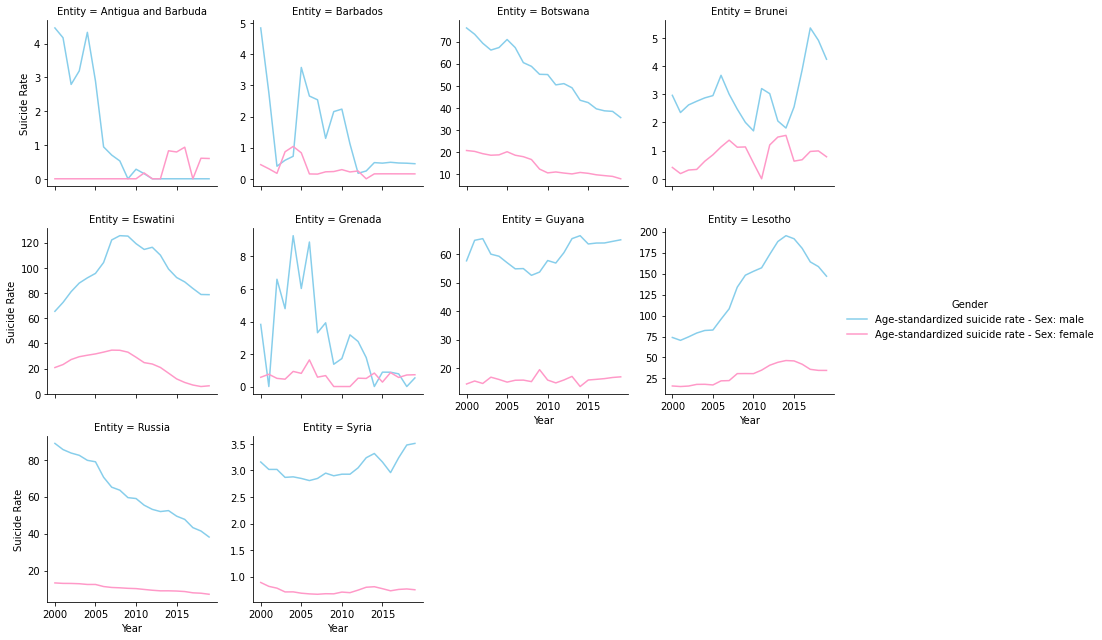

In [18]:
# create the FacetGrid
# col_wrap parameter sets how many graphs are in each row
# set sharey=False, each plot get its own y-axis scale. which is useful because the countries have vastly different suicide rate scales.

palette = {"Age-standardized suicide rate - Sex: male": "skyblue", 
           "Age-standardized suicide rate - Sex: female": "#FF99C8"}  # FF99C8 is a shade of pink

# Create the grid
g = sns.FacetGrid(df_mf_suicide, col='Entity', hue='Gender', col_wrap= 4, sharey= False, palette = palette)
g = g.map(plt.plot, 'Year', 'Suicide Rate').add_legend()

# # Set the y axis limit to 100
# g.set(ylim=(0, 200))

g.savefig("suicide_rates_facetgrid.png") # save the output as a png file, to include in the report
plt.show()

The Faceted Grid of Line Graphs presents the age-standardized suicide rates for both males and females over time in the 5 countries with the highest and 5 countries with the lowest suicide rates. It is distinctly evident that the top 5 countries exhibit significantly higher suicide rates compared to the bottom 5. This difference is starkly highlighted by the contrasting scales on the Y-axes of the respective graphs.

In the top 5 countries with the highest suicide rates (Botswana, Eswatini, Guyana, Lesotho, and Russia), there is a consistent trend indicating higher suicide rates among males compared to females over time. This pattern reinforces the commonly observed global phenomenon where male suicide rates surpass those of females, potentially due to varying social pressures, mental health stigma, and coping mechanisms between genders.

Conversely, the trends in the bottom 5 countries with the lowest suicide rates (Antigua and Barbuda, Barbados, Brunei, Grenada, and Syria) display no consistent pattern between genders. Notably, in countries like Syria and Brunei, male suicide rates also appear to be higher than those of females, albeit the overall rates are much lower compared to the top 5 countries. This suggests that while the overall suicide risk is lower in these nations, the gender disparity in suicide rates might still be present to some extent.

Significantly, in countries such as Antigua and Barbuda, Barbados, Brunei, and Grenada, which are among the bottom 5 for suicide rates, there are noticeable spikes in the suicide rates for males. These spikes may indicate specific years or periods where socio-economic or cultural stressors were particularly pronounced, leading to temporary increases in male suicide rates.

Additionally, it is noteworthy that in Russia and Botswana, two of the top 5 countries with the highest suicide rates, there is a discernible decreasing trend in suicide rates for both sexes. This trend could be indicative of effective public health interventions, improvements in mental health services, socio-economic development, or successful implementation of national suicide prevention strategies over the observed period. Understanding the factors contributing to the decreasing trends in Russia and Botswana could inform effective suicide prevention strategies in other contexts.

# Secondly, we will create a new data set containing only the data of the country with the highest suicide rates for both genders + the country with the lowest suicide rates for both genders
### Used to answer the following sub question:
- How do suicide rates differ between different age groups in the country with the highest suicide rate and in the country with the lowest suicide rate over time, for both genders?

In [19]:
# average_rates

In [20]:
# Sort " average_rates" to find the top and bottom country
top_1 = average_rates.nlargest(1)
bottom_1 = average_rates.nsmallest(1)

# combine top and bottom country
selected_country = pd.concat([top_1, bottom_1]).index.tolist()

# create a new data frame
top_bottom_country = df_combined[df_combined['Entity'].isin(selected_country)]

# top_bottom_country

# Scatterplots

In [21]:
# what are the names of the top and bottom countries
top_country = top_1.index[0]
bottom_country = bottom_1.index[0]

print(f"The country with the lowest overall suicide rate is: {bottom_country}")
print(f"The country with the highest overall suicide rate is: {top_country}")

The country with the lowest overall suicide rate is: Antigua and Barbuda
The country with the highest overall suicide rate is: Lesotho


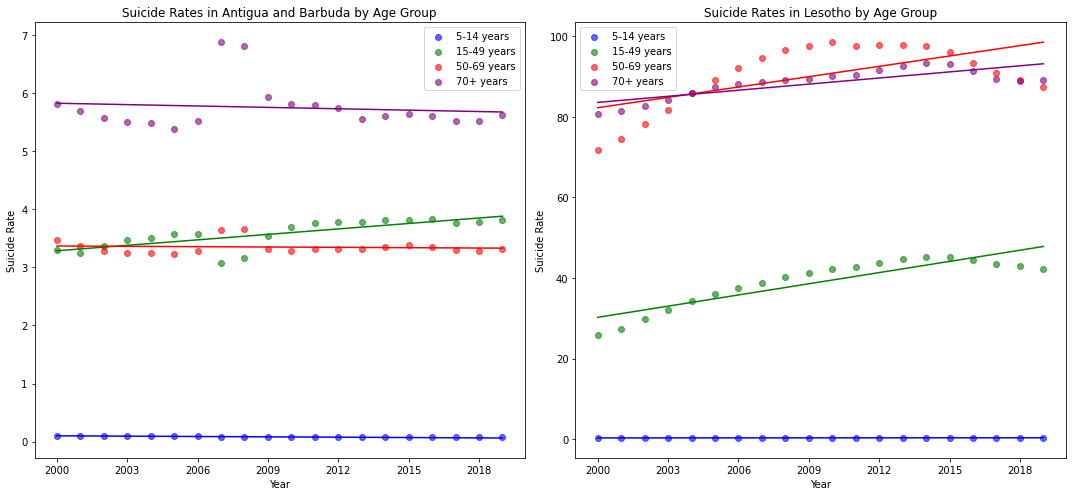

In [22]:
# separate the data for the two countries
df_bottom_country = top_bottom_country[top_bottom_country["Entity"] == bottom_country]
df_top_country = top_bottom_country[top_bottom_country["Entity"] == top_country]

# Function to plot scatter and trend line
def plot_scatter_and_trend(ax, df, x, y, label, color):
    #scatter plot
    ax.scatter(df[x], df[y], label=label, alpha=0.6, color=color)

    #trend line
    z = np.polyfit(df[x], df[y], 1)  # Linear fit with degree 1
    p = np.poly1d(z)  # polynomial function
    ax.plot(df[x], p(df[x]), color=color, linestyle='-')

# Create a figure object and set its size
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot for Bottom Country
plot_scatter_and_trend(axs[0], df_bottom_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)", '5-14 years', 'blue')
plot_scatter_and_trend(axs[0], df_bottom_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)", '15-49 years', 'green')
plot_scatter_and_trend(axs[0], df_bottom_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)", '50-69 years', 'red')
plot_scatter_and_trend(axs[0], df_bottom_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)", '70+ years', 'purple')
axs[0].set_title(f"Suicide Rates in {bottom_country} by Age Group")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Suicide Rate")
axs[0].legend()

#for Top Country
plot_scatter_and_trend(axs[1], df_top_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 5-14 years (Rate)", '5-14 years', 'blue')
plot_scatter_and_trend(axs[1], df_top_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 15-49 years (Rate)", '15-49 years', 'green')
plot_scatter_and_trend(axs[1], df_top_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 50-69 years (Rate)", '50-69 years', 'red')
plot_scatter_and_trend(axs[1], df_top_country, "Year", "Deaths - Self-harm - Sex: Both - Age: 70+ years (Rate)", '70+ years', 'purple')
axs[1].set_title(f"Suicide Rates in {top_country} by Age Group")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Suicide Rate")
axs[1].legend()

#the x-axis ticks for each subplot
# For the first subplot (Bottom Country)
years_bottom = df_bottom_country["Year"].unique()
axs[0].set_xticks(np.arange(min(years_bottom), max(years_bottom)+1, 3.0))

# for the second subplot (Top Country)
years_top = df_top_country["Year"].unique()
axs[1].set_xticks(np.arange(min(years_top), max(years_top)+1, 3.0))


plt.tight_layout()

fig.savefig("suicide_rates_scatter.png")
plt.show()

The scatter plots reveal distinct trends in suicide rates across different age groups over time in Antigua and Barbuda and Lesotho. In both countries, there is a noticeable increasing trend in suicide rates among the 15-49 age group. This rise could suggest underlying societal or mental health challenges specific to this demographic. Understanding these factors in detail is essential for developing effective, targeted interventions.

In Lesotho, the data indicates that individuals aged 50 years and older have significantly higher suicide rates compared to other age groups. This difference may be attributed to a range of factors, including age-related health issues, social isolation, or economic hardships, especially impacting the older population. Investigating these challenges, along with analyzing trends in similarly situated countries, can offer vital insights for prevention and support strategies

Additionally, the trend of higher suicide rates in the 70+ age group in both countries suggests unique challenges faced by the elderly. Delving into the social, economic, and healthcare aspects influencing this trend is critical for adequately addressing the needs of this vulnerable group.

Fortunately, the suicide rates in the 5-14 age group are the lowest for both Antigua and Barbuda and Lesotho, showing a uniformly low trend. This could be due to protective factors common in younger children, such as strong family bonds and lesser exposure to societal stressors. Despite the lower rates, the importance of mental health education and support for this age group cannot be overstated. Understanding the factors that contribute to these low rates can provide valuable insights for suicide prevention across various age demographics.